# Example: Extract table from Wikipedia

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

Read the tables directly from the website

In [109]:
wiki_simpsons = pd.read_html('https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes_(seasons_1%E2%80%9320)')
len(wiki_simpsons) # tables read

23

In [110]:
season1 = wiki_simpsons[1] # season 1
season1.head()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,1,1,"""Simpsons Roasting on an Open Fire""",David Silverman,Mimi Pond,"December 17, 1989",7G08,26.7[46]
1,2,2,"""Bart the Genius""",David Silverman,Jon Vitti,"January 14, 1990",7G02,24.5[46]
2,3,3,"""Homer's Odyssey""",Wes Archer,Jay Kogen & Wallace Wolodarsky,"January 21, 1990",7G03,27.5[47]
3,4,4,"""There's No Disgrace Like Home""",Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,"January 28, 1990",7G04,20.2[48]
4,5,5,"""Bart the General""",David Silverman,John Swartzwelder,"February 4, 1990",7G05,27.1[49]


## Cleaning the U.S. Viewers column

In [111]:
viewers = season1.columns[-1]
viewers

'U.S. viewers(millions)'

In [112]:
season1[viewers] = season1[viewers].apply(lambda x: float(x.split('[')[0]))

In [113]:
season1[viewers].head()

0    26.7
1    24.5
2    27.5
3    20.2
4    27.1
Name: U.S. viewers(millions), dtype: float64

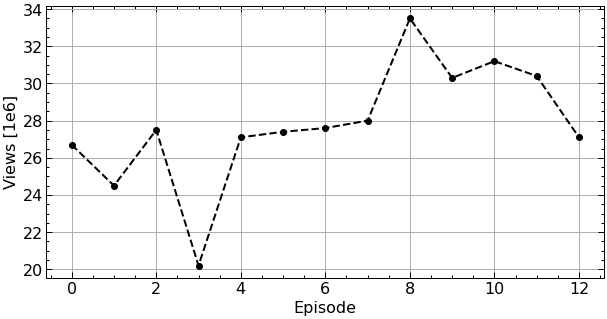

In [115]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(season1[viewers], 'k--o')
ax.set_xlabel('Episode')
ax.set_ylabel('Views [1e6]')
plt.grid()
plt.show()